# Assignment 05 - Data Visualization II

Problem Statement
1.	Use the inbuilt dataset 'titanic' as used in the assignment #4. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names: 'sex' and 'age')
2.	Write observations on the inference from the above statistics.


In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [34]:
df["HasCabin"] = df["Cabin"].notna()

In [35]:
df = df.drop(columns=["Cabin"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True


In [40]:
def remove_outliers(df:pd.DataFrame, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    return df[(df[col] >= lower_bound)&(df[col] <= upper_bound)]

In [42]:
df = remove_outliers(df, "Age")
df = remove_outliers(df, "Fare")

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,449.544681,0.329078,2.521986,28.036879,0.398582,0.307801,16.933740
std,260.095270,0.470212,0.713017,9.493571,0.841905,0.778080,13.081676
min,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,220.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.879200
50%,450.000000,0.000000,3.000000,28.000000,0.000000,0.000000,11.133300
75%,676.000000,1.000000,3.000000,32.000000,1.000000,0.000000,25.466700
max,891.000000,1.000000,3.000000,52.000000,5.000000,6.000000,61.379200


# Data Visualization

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

## Distribution Plots

<Axes: xlabel='Age', ylabel='Count'>

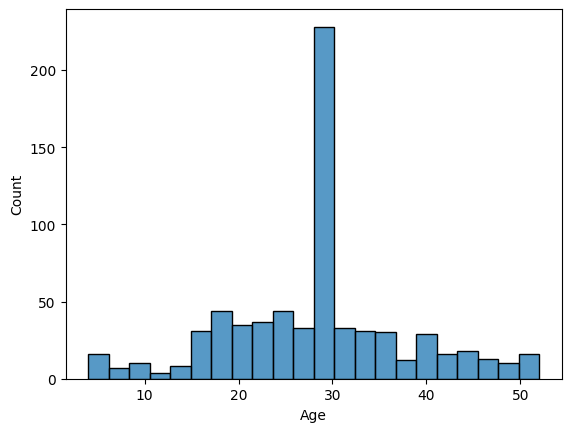

In [48]:
sns.histplot(data=df, x="Age")

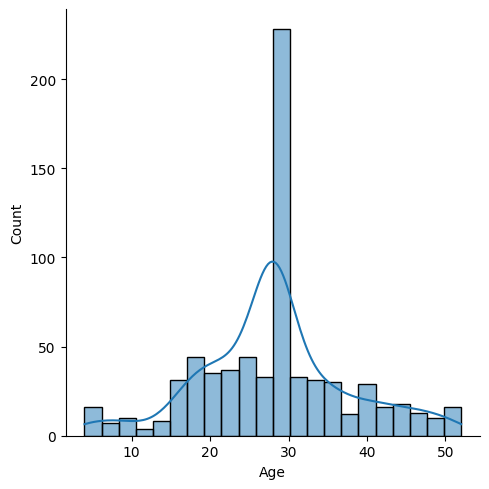

In [54]:
sns.displot(df, x="Age", kde=True)

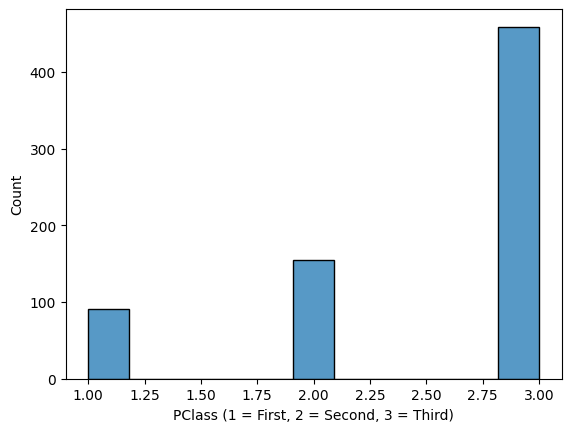

In [56]:
sns.histplot(df, x="Pclass")
plt.xlabel("PClass (1 = First, 2 = Second, 3 = Third)")
plt.show()

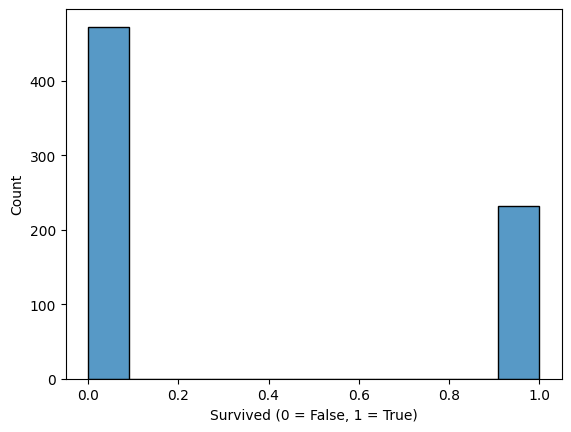

In [58]:
sns.histplot(df, x="Survived")
plt.xlabel("Survived (0 = False, 1 = True)")
plt.show()

## Comparative Distributions

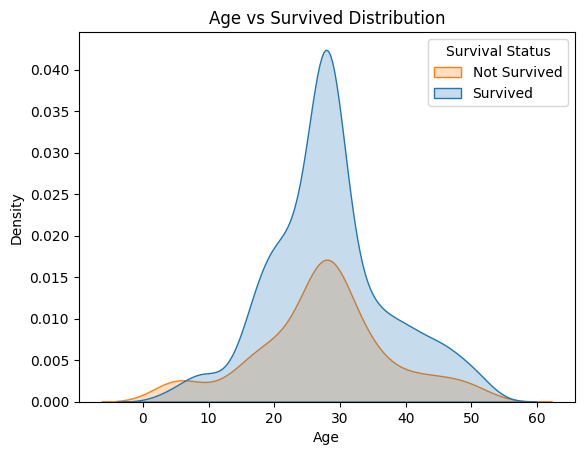

In [62]:
sns.kdeplot(df, x="Age", hue="Survived", fill=True)
plt.legend(title="Survival Status", labels=["Not Survived", "Survived"])
plt.title("Age vs Survived Distribution")
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

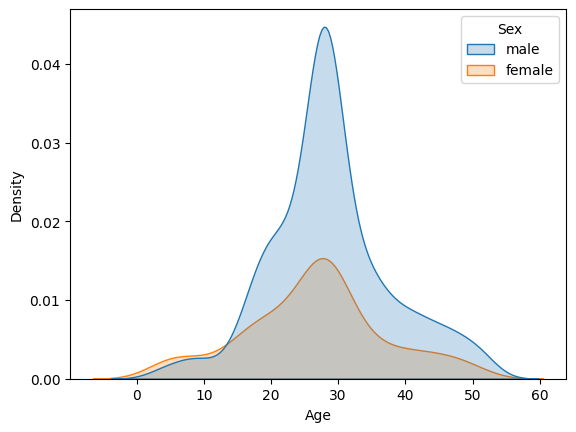

In [63]:
sns.kdeplot(df, x="Age", hue="Sex", fill=True)

[]

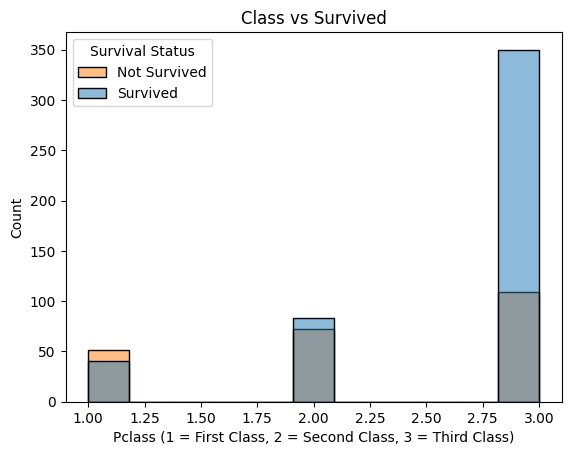

In [68]:
sns.histplot(df, x="Pclass", hue="Survived", fill=True)
plt.xlabel("Pclass (1 = First Class, 2 = Second Class, 3 = Third Class)")
plt.legend(title="Survival Status", labels=["Not Survived","Survived"])
plt.title("Class vs Survived")
plt.plot()

<Axes: xlabel='Age', ylabel='Fare'>

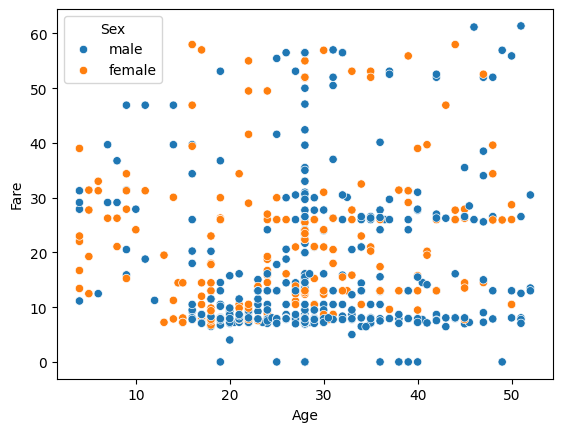

In [77]:
sns.scatterplot(df, x="Age", y="Fare", hue="Sex")

<Axes: xlabel='Age', ylabel='Fare'>

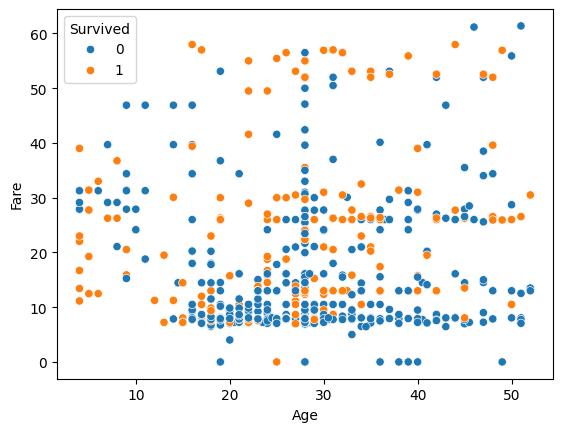

In [83]:
sns.scatterplot(df, x="Age", y="Fare", hue="Survived")

<Axes: xlabel='Survived', ylabel='Fare'>

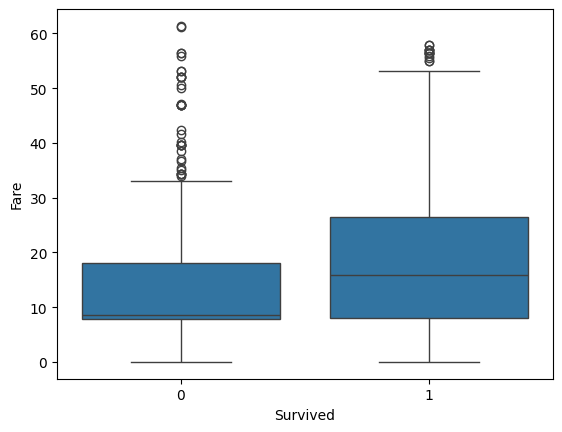

In [86]:
sns.boxplot(df, x="Survived", y="Fare")

<Axes: xlabel='Survived', ylabel='Age'>

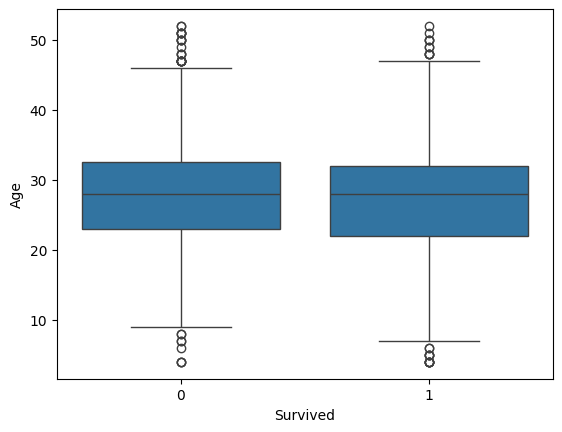

In [87]:
sns.boxplot(df, x="Survived", y="Age")

<Axes: xlabel='Pclass', ylabel='Age'>

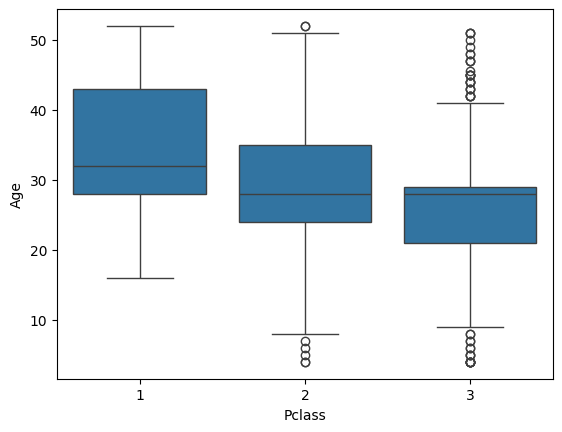

In [88]:
sns.boxplot(df, x="Pclass", y="Age")